y = wx + b

In [69]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

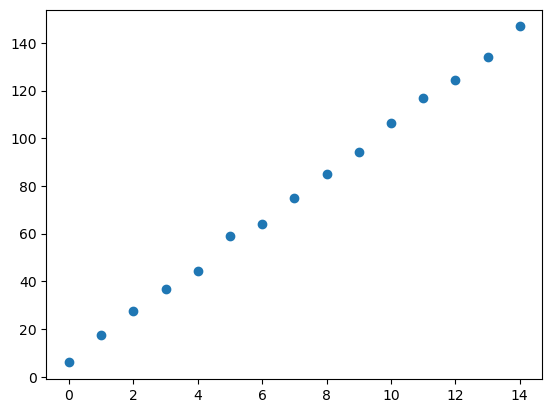

In [117]:
# generate random data points
num_data_points = 15
scale = 10
bias = 4

x = [i for i in range(num_data_points)]
y = [scale*i + bias + random.random() * 10 for i in range(num_data_points)]

plt.scatter(x,y)

In [106]:
def initialize_random_weight():
    return random.random(), random.random()

def forward_pass(weight, bias, x):
    return [weight * data + bias for data in x]

def loss_function(prediction, real):
    return (prediction - real)**2

def cost_function(predicted_y, real_y): 
    assert len(predicted_y) == len(real_y)
    cost = 0
    for prediction,real in zip(predicted_y, real_y):
        cost += loss_function(prediction, real)
    
    return cost/(2*len(predicted_y))

def dj_dw(x, y, weight, bias):
    predictions = forward_pass(weight, bias, x)
    cost = 0
    for prediction, real, input_ in zip(predictions, y, x):
        cost += (prediction - real) * input_
    return cost / len(predictions)

def dj_db(x, y, weight, bias):
    predictions = forward_pass(weight, bias, x)
    cost = 0
    for prediction, real, input_ in zip(predictions, y, x):
        cost += (prediction - real) 
    return cost / len(predictions)

def gradient_step(x, y, weight, bias, alpha): 
    tmp_w = weight - alpha * dj_dw(x, y, weight, bias)
    tmp_b = bias - alpha * dj_db(x, y, weight, bias)

    return tmp_w, tmp_b

def create_batches(x, y, batch_size):
    for start_idx in range(0, len(x), batch_size):
        excerpt = slice(start_idx, start_idx + batch_size)
        yield x[excerpt], y[excerpt]

3512.13312205986


Text(0.5, 1.0, 'Model predictions')

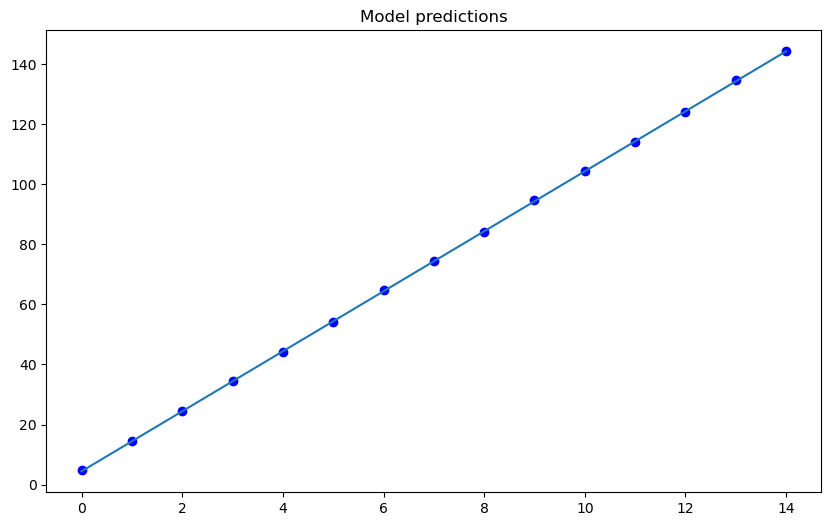

In [115]:
weight, bias = initialize_random_weight()
prediction = forward_pass(weight, bias, x)
cost = cost_function(prediction, y)
print(cost)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
costs = []
num_epochs = 100
batch_size = 1
for i in range(num_epochs):
    for batch_x, batch_y in create_batches(x, y, batch_size):
        weight, bias = gradient_step(x, y, weight, bias, 0.01)  
    prediction = forward_pass(weight, bias, x)
    cost = cost_function(prediction, y)
    costs.append(cost)   

plt.plot(x, prediction) 
plt.title("Model predictions")

Text(0.5, 1.0, 'Cost per epoch')

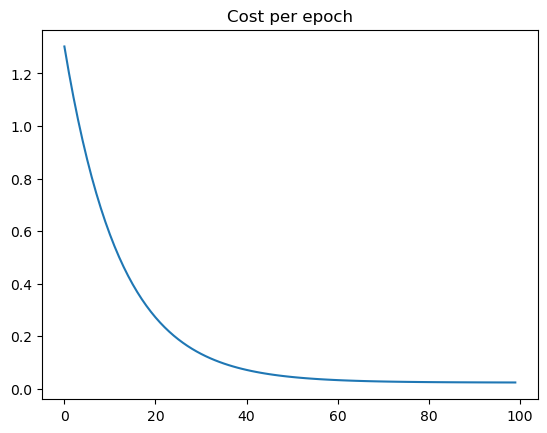

In [116]:
plt.plot([x for x in range(num_epochs)], costs)
plt.title("Cost per epoch")